# 딥러닝을 이용해서 이미지 분류

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import koreanize_matplotlib
import seaborn as sns

In [2]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape # 가로세로 28x28 짜리가 6만개 있음

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

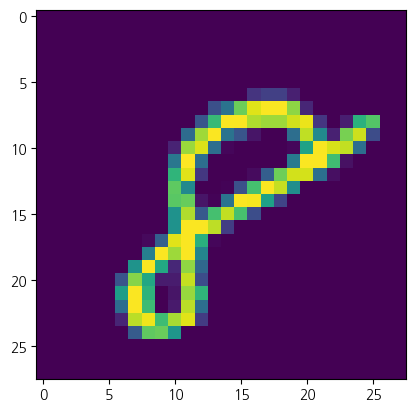

In [5]:
plt.imshow(X_train[59999]) # 이런 손글씨가 X_train에는 6만개, X_test에는 만개가 있음.

In [6]:
# 컴퓨터는 어떻게 이미지를 인식하는가? --> 숫자들의 조합!
for x in X_train[0]:
    print(x)
    for i in x: # 리스트 안에 있으니까 한번 더 돌려
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n') # \n줄바꿈

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253

In [7]:
# 0-255의 숫자로 이뤄져있다.

In [8]:
X_train.shape[0]

60000

In [9]:
# 차원 변환 과정 보기
X_train = X_train.reshape(X_train.shape[0], 784)

In [10]:
X_train.shape

(60000, 784)

In [11]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
# 케라스에서 이미지 분석을 할 때 데이터를 0에서 1사이의 값으로 변환해야 분석이 잘 됨.
# 이미지 분석을 할 때 꼭 해줘야하는 작업은 255로 나누어주는 작업이 필수.
# 이러한 작업을 데이터 정규화(nomalization)이라고 한다.
X_train = X_train.astype('float64')
X_train = X_train / 255

In [13]:
X_test = X_test.reshape(X_test.shape[0], 784)
X_test = X_test.astype('float64')
X_test = X_test / 255

In [14]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_train[4] # 이미지 숫자의 정답지

9

타겟변수가 숫자로 되어있는데, 카테고리인 얘를 원핫인코딩으로 더미변수화를 해야해.

In [16]:
# 타겟이 카테고리형이어야 하기 때문에 숫자로 된 타켓 컬럼을 원핫인코딩 해줌
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

딥러닝을 이용한 mnist손글씨 분석

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [19]:
X_train.shape

(60000, 784)

In [20]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Dense는 2의 배수로 넣어주기. 카테고리가 10개라서 10이야.

In [21]:
pwd

'c:\\bigdata'

In [22]:
# 모델 최적화를 위한 설정
model_dir = "./model/"
if not os.path.exists(model_dir): # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath="./model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

모델이 없으면 자동으로 만들어서 파일을 넣어라.,

In [23]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, 
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.19690, saving model to ./model\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19690 to 0.13834, saving model to ./model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13834 to 0.11561, saving model to ./model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11561 to 0.10338, saving model to ./model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10338 to 0.09381, saving model to ./model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09381 to 0.08792, saving model to ./model\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08792 to 0.08266, saving model to ./model\MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08266

Epoch 9: val_loss improved from 0.08266 to 0.07629, saving model to ./model\MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.07629

Epoch 11: val_loss did not improve from 0.07629

Epoch 12: val_loss did not improve from 0.07629

Epoch 13: val_loss did not improve from 0.07629

Epoch 14: val_loss did 

In [24]:
score = model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9810
loss: 0.06896534562110901
accuracy:  0.9810000061988831


In [25]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

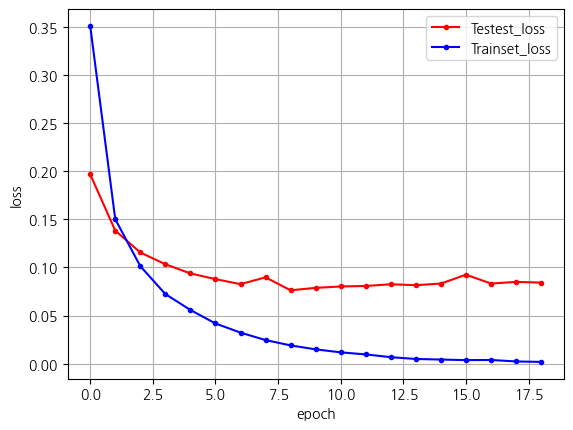

In [26]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testest_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 합성곱 신경망(Convolution Neural Network) CNN
* 입력된 이미지에서 다시 한 번 특징을 추출하기 위해서 커널(필터)을 이용하는 방법


* CNN 순서
  * 원본 
  - 합성곱(특성추출, 차원축소) 
  - 풀링(특성추출, 차원축소 Max Pooling, Average Pooling) 
  - 드롭아웃(은닉층의 노드를 일부러 꺼줌. 과적합 방지를 위해서)
  - 플래튼(2차원 데이터를 1차원으로 변환) - 은닉층과 연결(deep learning 연산) 
  - softmax, sigmoid로 분류 분석

In [27]:
# MNIST 손글씨 데이터 불러와 저장하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32') /255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') /255
y_train = to_categorical(y_train) # 원핫인코딩 해주기
y_test = to_categorical(y_test)

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [30]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(63, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
# 딥러닝 설정하기
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 63)        18207     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 63)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 63)        0         
                                                                 
 flatten (Flatten)           (None, 9072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1161344   
                                                      

input_shape=(28, 28, 1) 가 input_dim의 역할을 한다.

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 최적화를 위한 설정
model_dir = "./model/"
if not os.path.exists(model_dir): # 디렉토리가 없을 때 자동 생성
    os.mkdir(model_dir)
    
modelpath="./model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [32]:
import tensorflow as tf
# 텐서가 어디에 할당 되어 있는지 확인
print(tf.debugging.set_log_device_placement(True))

None


In [33]:
# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, 
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08576, saving model to ./model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08576 to 0.06002, saving model to ./model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06002 to 0.05168, saving model to ./model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05168 to 0.04587, saving model to ./model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04587 to 0.04282, saving model to ./model\MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04282

Epoch 7: val_loss improved from 0.04282 to 0.03900, saving model to ./model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.03900

Epoch 9: val_loss improved from 0.03900 to 0.03799, saving model to ./model\MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03799

Epoch 11: val_loss improved from 0.03799 to 0.03728, saving model to ./model\MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.03728

Epoch 13: val_loss did not improve from 0.03728

Epoch 14: val_loss did 

In [34]:
score = model.evaluate(X_test, y_test)
print('loss:', score[0])
print('accuracy: ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0335 - accuracy: 0.9916
loss: 0.033537693321704865
accuracy:  0.991599977016449


In [35]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

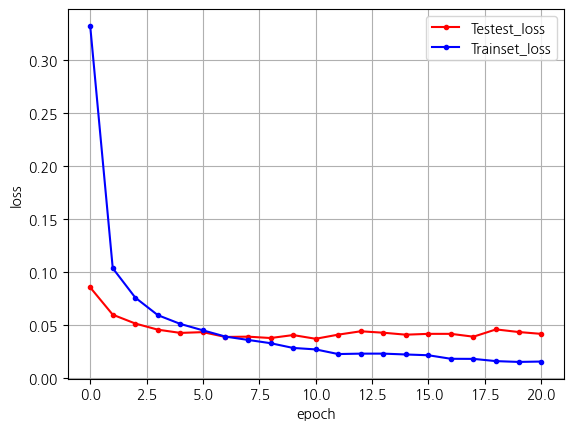

In [36]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testest_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()